# PIL
- 공부하는 이유: Keras 이미지 프로세싱은 PIL을 기본으로 하고 있다.

# imageio
또 다른 이미지 처리 라이브러리

In [2]:
import imageio

In [3]:
dir(imageio)

['RETURN_BYTES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'core',
 'formats',
 'get_reader',
 'get_writer',
 'help',
 'imread',
 'imsave',
 'imwrite',
 'mimread',
 'mimsave',
 'mimwrite',
 'mvolread',
 'mvolsave',
 'mvolwrite',
 'plugins',
 'read',
 'save',
 'show_formats',
 'volread',
 'volsave',
 'volwrite']

In [35]:
a = imageio.imread("첨부파일/20191115 11일차 첨부자료/BTD.jpg")

In [4]:
import numpy as np

In [9]:
b = np.array([1,2,3])

In [10]:
issubclass(type(a), type(b))

True

> - `issubclass`는 상속받았는지 확인하는 함수이다.
- imageio는 numpy를 상속받았다.
    - numpy를 상속받아서 이미지 처리 기능을 추가했다.
    - numpy의 기능을 거의 다 쓸 수 있다.

# matplotlib
matplotlib도 이미지 처리를 지원한다.

In [11]:
import matplotlib.pyplot as plt

In [12]:
im = plt.imread("첨부파일/20191115 11일차 첨부자료/BTD.jpg")

In [14]:
im

array([[[172, 167, 129],
        [178, 173, 135],
        [177, 172, 134],
        ...,
        [176, 171, 142],
        [170, 165, 136],
        [167, 162, 133]],

       [[175, 170, 132],
        [175, 170, 132],
        [171, 166, 128],
        ...,
        [176, 171, 142],
        [172, 167, 138],
        [170, 165, 136]],

       [[170, 165, 127],
        [171, 166, 128],
        [171, 166, 128],
        ...,
        [176, 171, 142],
        [173, 168, 139],
        [171, 165, 139]],

       ...,

       [[216, 204, 180],
        [213, 201, 177],
        [214, 202, 178],
        ...,
        [206, 193, 176],
        [207, 194, 177],
        [208, 195, 178]],

       [[218, 206, 182],
        [214, 202, 178],
        [214, 202, 178],
        ...,
        [208, 195, 178],
        [211, 198, 181],
        [211, 198, 181]],

       [[222, 210, 186],
        [216, 204, 180],
        [215, 203, 179],
        ...,
        [207, 194, 177],
        [212, 199, 182],
        [212, 199, 182]]

In [13]:
im.shape

(4608, 2592, 3)

> - matplotlib 이미지 처리도 numpy를 이용해서 만들었다.
- 크기가 워낙 크니까 ...으로 중간 생략해서 보여준다.

# 이미지 처리 기본

In [15]:
r, g, b = im[:,:,0], im[:,:,1], im[:,:,2], 

> - channel 분리하는 방법에는 numpy를 이용하는 방법도 있다.
- 이미지 처리는 거의 다 numpy로 되어있으므로 numpy 쓰는 방법만 알면 어디서나 쓸 수 있다.

In [21]:
import matplotlib

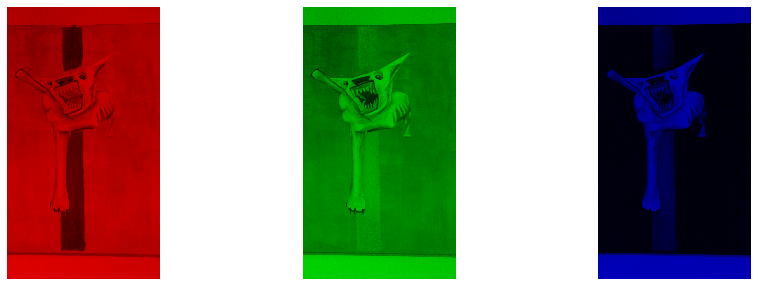

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

In [36]:
a.dtype

dtype('uint8')

In [37]:
a = a/255

In [38]:
a.dtype

dtype('float64')

In [42]:
a = a.astype("uint8")

In [43]:
a.dtype

dtype('uint8')

> - `astype`은 형 변환 메서드이다.
- 나누기를 실행하면서 int형이 자동으로 float으로 바뀌었다. 
- data type을 맞추기 위해서 사용한다.

# Einsum
- 아인슈타인이 만든 행렬 계산 표기법
- 많은 프레임워크가 Einsum 연산에 최적화되어 있다.

In [ ]:
import numpy as np

In [46]:
np.array([1,2]) * np.array([3,4])

array([3, 8])

> - `*`는 element wise 곱셈

In [47]:
np.array([1,2]) @ np.array([3,4])

11

> `@`는 내적

In [50]:
np.array([1,2]).T @ np.array([3,4])

11

> - 내적은 열벡터와 행벡터라도 상관없다.

In [48]:
np.array([1]) * np.array([3,4])

array([3, 4])

> - broadcasting 기능으로 인해서 모양이 안 맞아도 계산이 된다.

In [45]:
A = np.array([0,1,2])
B = np.array([[0,1,2,3], [4,5,6,7], [8,9,10,11]])

In [49]:
# Error

A * B

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

> - broadcasting이 항상 되는 것은 아니다.
- 차원은 맞아야한다.

In [54]:
A.shape

(3,)

In [53]:
B.shape

(3, 4)

In [55]:
A[:, np.newaxis].shape

(3, 1)

In [51]:
A[:, np.newaxis] * B

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [16, 18, 20, 22]])

In [56]:
(A[:, np.newaxis] * B).sum(axis=1)

array([ 0, 22, 76])

> - `np.newaxis`로 차원을 늘려서 차원 수를 맞춰줬다. 
- 차원 수는 맞지만 모양은 맞지 않았다. 그래도 broadcasting이 적용되서 계산이 되었다.

In [57]:
np.einsum('i,ij->i', A, B)

array([ 0, 22, 76])

> - einsum은 문자열로 간단히 표현해서 복잡한 행렬 계산을 처리할 수 있다.

In [59]:
A = np.eye(10)

In [60]:
A

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [63]:
np.einsum("ii-> i", A)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

> - `ii->`
    - `ii`: i번째 행, i번째 열에 해당하는 값을 가져와서 
    - `-> i`: i라는 행렬을 만들어라

In [61]:
diag = np.einsum("ii->", A)

In [62]:
diag

10.0

> - `->`: 화살표 뒤에가 비어 있으면 더한다.

In [65]:
t = np.array([[1,2,],[3,4]])
np.einsum("kk -> k", t)

array([1, 4])

> - 문자는 i이든 k이든 상관없다.

In [67]:
t = np.array([[1,2,3],[3,4,5],[7,8,9]])
t

array([[1, 2, 3],
       [3, 4, 5],
       [7, 8, 9]])

In [68]:
np.einsum("ij -> ji", t)

array([[1, 3, 7],
       [2, 4, 8],
       [3, 5, 9]])

> - einsum으로 transpose도 직관적으로 표현할 수 있다.

In [69]:
t = np.array([[1,2],[3,4]])
np.einsum("jk ->", t)

10

> - `jk`는 j번째 행, k번째 열을 가져오란 말이다.
    - 그러면 j,k가 서로 같은 경우는 배제하는거 아닌가요?
    - j에 대해서 처음부터 끝까지, k에 대해서 처음부터 끝까지 순차적으로 돌아간다.
    - 즉, 중복(j==k)을 포함한다.

In [73]:
a = np.arange(6).reshape(2,3)
np.einsum("ij -> i", a)

array([ 3, 12])

In [74]:
np.einsum("ij -> j", a)

array([3, 5, 7])

> - `->`를 axis 개념으로 해석할 수 있다.
    - `ij -> i`는 i번째 행, j번째 열의 값을 가져와서 
    - `->` 뒤에 표시가 없으면 더한다.
    - `i`는 있지만 `j`는 없으므로 i(행)으로 표시하고, 열은 더해라.

In [76]:
a = np.arange(6).reshape(2,3)
b = np.arange(3)

In [77]:
a*b

array([[ 0,  1,  4],
       [ 0,  4, 10]])

In [78]:
np.einsum("ik,k -> i", a,b)

array([ 5, 14])

> - `a`는 i에 대응하고 `b`는 k에 대응한다.

In [80]:
a = np.array([1,2,3]) # 1차원 
np.einsum("i ->", a)

6

In [81]:
# Error

a = np.array([1,2,3],[0, 5,11]) # 2차원 
np.einsum("i ->", a)

TypeError: data type not understood

In [96]:
a = np.array([[1,2,3],[0, 5,11]]) # 2차원 

np.einsum("ik->", a)

22

> - array의 차원 수 만큼 변수를 지정해야한다.
    - 예를 들어 2차원 매트릭이스면 `ij`, `ik`등을 해야한다.

In [98]:
a = np.array([[1,2,3],[4,5,6]])
b = np.arange(15).reshape(3,5)
np.einsum("ik,kj->ij", a, b)

array([[ 40,  46,  52,  58,  64],
       [ 85, 100, 115, 130, 145]])

> - 행렬 곱과 같다.
- axis 개념이라고 생각해도 좋다.
- ik, kj 모양이라서 k가 맞으면 (i,k) 크기 행렬 곱하기 (k,j) 와 같다.

In [102]:
b = np.arange(3)
c = np.arange(3,6)
np.einsum("i,j ->" , b, c)

36

> - dot product
- 내적과 같다. (넘파이의 `@`)

In [103]:
b = np.arange(6,12).reshape(2,3)
np.einsum("ij,ij->", a, b)

196

In [104]:
b

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [105]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [103]:
b = np.arange(6,12).reshape(2,3)
np.einsum("ij,ij->", a, b)

196

> - element wise 곱셈과 같다.

In [106]:
b = np.arange(6,12).reshape(2,3)
np.einsum("ij,ij->ij", a, b)

array([[ 6, 14, 24],
       [36, 50, 66]])

> - 화살표 끝에 `ij`가 있는지 없는지 잘 확인하기
- 차이가 뭔지 아시겠나요?
- 결과가 행렬로 나왔다.

In [107]:
from itertools import repeat

In [113]:
dir(repeat)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [114]:
t = repeat(5)

In [115]:
next(t)

5

In [116]:
next(t)

5

In [117]:
next(t)

5

In [118]:
t = repeat(5, 2)

In [119]:
next(t)

5

In [120]:
next(t)

5

In [121]:
next(t)

StopIteration: 

> - next할때마다 첫번째 인자를 반복해서 돌려준다.
- 두번째 인자로 반복 횟수를 정할 수 있다.

In [123]:
np.repeat([1,2,3], 2)

array([1, 1, 2, 2, 3, 3])

In [125]:
np.repeat([1,2,3], [2,3,5])

array([1, 1, 2, 2, 2, 3, 3, 3, 3, 3])

In [126]:
# Error
np.repeat([1,2,3], [2,3])

ValueError: operands could not be broadcast together with shape (3,) (2,)

> - `np.repeat`은 iterable 안의 객체를 반복해서 값을 만들어준다.
- 두번째 인자를 여러개 넣으면 각 위치에 해당하는 값만 반복해준다.
- 첫번째 인자와 두번째 인자의 길이는 같아야한다. 
- python의 repeat과 차이가 있다.


In [127]:
x = np.eye(2)

In [128]:
x.flatten()

array([1., 0., 0., 1.])

In [133]:
x.repeat(2)

array([1., 1., 0., 0., 0., 0., 1., 1.])

In [129]:
np.tile(x, (2,3))

array([[1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

> - `np.tile`은 모양을 유지한채로 복사한다.
- 두번째 인자 `(2,3)`은 행방향으로 2번 복사, 열방향으로 3번 복사한다는 뜻이다.
- `np.repeat`은 복사하는 차이가 있다.`flatten`한 것 처럼 일렬로 반환한다.

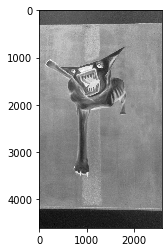

In [156]:
plt.imshow((im * np.array([0.2989, 0.5870, 0.1140])).sum(axis=2), cmap="Greys")

> - 흑백이미지로 변환하기
- 단순히 평균 내는 것이 아니라 색채널별로 가중치를 준다. 
    - 색은 어떻게 조합하느냐에 따라서 달라지므로 무식하게 평균 내는 것은 옳지않다.

# skimage

In [158]:
from skimage import data # 모든 프레임워크는 연습용 데이터를 가지고 있다.

In [159]:
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [160]:
data.astronaut().shape

(512, 512, 3)

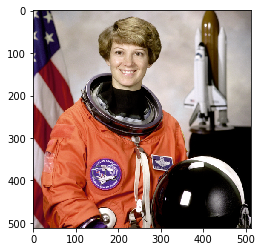

In [161]:
plt.imshow(data.astronaut())

In [162]:
from skimage import draw

In [176]:
rr, ss = draw.rectangle((210,210), (400,400))
im = data.astronaut()

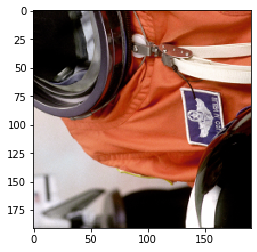

In [177]:
plt.imshow(im[rr,ss])

> - PIL의 draw와 다르다.
    - PIL은 composition 방식으로 이미지를 직접 수정했다.
- skimage의 draw는 도형 array를 만들어준다.
    - slicing해서 원하는 색상값을 덮어 써서 그림을 그린다.

In [178]:
from skimage import exposure

In [179]:
exposure.histogram(im)

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


(array([86818, 13816,  9374,  6196,  4714,  4270,  4431,  4327,  3866,
         3619,  3385,  3475,  3936,  3478,  3094,  2875,  2505,  2383,
         2381,  2434,  2424,  2425,  2495,  2497,  2561,  2526,  2596,
         2475,  2419,  2458,  2278,  1991,  1741,  1614,  1645,  1741,
         1662,  1784,  1631,  1644,  1657,  1688,  1678,  1640,  1807,
         1835,  1794,  1906,  1882,  1927,  2008,  1959,  2009,  2021,
         2022,  2063,  2061,  2008,  2060,  2014,  2058,  1991,  2088,
         1978,  2054,  2099,  2131,  2136,  2202,  2220,  2197,  2339,
         2346,  2281,  2303,  2369,  2409,  2434,  2468,  2507,  2663,
         2672,  2693,  2617,  2633,  2637,  2641,  2650,  2537,  2549,
         2540,  2580,  2396,  2300,  2290,  2301,  2183,  2155,  2147,
         2124,  2167,  2180,  2077,  2181,  2158,  2216,  2151,  2130,
         2184,  2278,  2203,  2263,  2215,  2360,  2309,  2313,  2489,
         2482,  2516,  2418,  2415,  2393,  2327,  2268,  2120,  2089,
      

In [187]:
y, x = exposure.histogram(im)

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """Entry point for launching an IPython kernel.


In [188]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<BarContainer object of 256 artists>

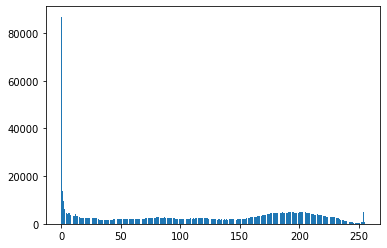

In [193]:
plt.bar(x,y)